In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.linewidth"] = 2
plt.style.use("ggplot")

In [32]:
df = pd.read_csv('Merge Data.csv')
df.head(10)

,Ticker,Date,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018,98.6,98.7,98.6,98.7,760,0
5,VIC,10/17/2018,98.7,98.7,98.7,98.7,2580,0
6,VIC,10/17/2018,98.8,98.8,98.8,98.8,150,0
7,VIC,10/17/2018,98.7,98.8,98.7,98.7,2070,0
8,VIC,10/17/2018,98.7,98.8,98.7,98.8,12100,0
9,VIC,10/17/2018,98.8,98.8,98.8,98.8,100,0


In [33]:
df.shape


(459335, 8)

In [34]:
df.describe()

,Open,High,Low,Close,Volume,Open Interest
count,459335.000000,459335.000000,459335.000000,459335.000000,4.593350e+05,459335.0
mean,74.545826,74.626579,74.481065,74.546183,4.909390e+03,0.0
std,23.023346,23.038201,23.011619,23.024380,1.902104e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+00,0.0
25%,54.190000,54.250000,54.150000,54.190000,3.600000e+02,0.0
50%,75.730000,75.920000,75.600000,75.720000,1.500000e+03,0.0
75%,90.100000,90.200000,90.000000,90.100000,4.920000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,3.300680e+06,0.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459335 entries, 0 to 459334
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         459335 non-null  object 
 1   Date           459335 non-null  object 
 2   Open           459335 non-null  float64
 3   High           459335 non-null  float64
 4   Low            459335 non-null  float64
 5   Close          459335 non-null  float64
 6   Volume         459335 non-null  int64  
 7   Open Interest  459335 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 28.0+ MB


In [36]:
df["Date"] = pd.to_datetime(df.Date,  infer_datetime_format=True)
df.index=df["Date"]
df.head()

,Ticker,Date,Open,High,Low,Close,Volume,Open Interest
Date,,,,,,,,
2018-10-17,VIC,2018-10-17,98.5,98.5,98.5,98.5,390,0
2018-10-17,VIC,2018-10-17,98.5,98.5,98.5,98.5,760,0
2018-10-17,VIC,2018-10-17,98.6,98.6,98.6,98.6,2060,0
2018-10-17,VIC,2018-10-17,98.6,98.6,98.6,98.6,5540,0
2018-10-17,VIC,2018-10-17,98.6,98.7,98.6,98.7,760,0


In [37]:
FPT = df[df["Ticker"] == "FPT"]
MSN = df[df["Ticker"] == "MSN"]
PNJ = df[df["Ticker"] == "PNJ"]
VIC = df[df["Ticker"] == "VIC"]
FPT.head(10)

,Ticker,Date,Open,High,Low,Close,Volume,Open Interest
Date,,,,,,,,
2018-12-25,FPT,2018-12-25,30.89,30.89,30.89,30.89,35410,0
2018-12-25,FPT,2018-12-25,30.81,30.81,30.81,30.81,190,0
2018-12-25,FPT,2018-12-25,30.74,30.81,30.74,30.74,1120,0
2018-12-25,FPT,2018-12-25,30.74,30.74,30.74,30.74,2120,0
2018-12-25,FPT,2018-12-25,30.74,30.74,30.74,30.74,22500,0
2018-12-25,FPT,2018-12-25,30.74,30.74,30.70,30.74,7140,0
2018-12-25,FPT,2018-12-25,30.66,30.74,30.59,30.66,16480,0
2018-12-26,FPT,2018-12-26,31.04,31.11,31.04,31.11,2650,0
2018-12-26,FPT,2018-12-26,31.19,31.19,31.19,31.19,500,0


In [38]:
mean_Close_Ticker = df.groupby("Ticker")["Close"].mean()
mean_Close_Ticker

Ticker
FPT     45.071631
MSN     74.880759
PNJ     72.179371
VIC    105.378791
Name: Close, dtype: float64

In [39]:
lst = ['FPT','MSN','PNJ','VIC']
Ticker = [FPT, MSN, PNJ, VIC]

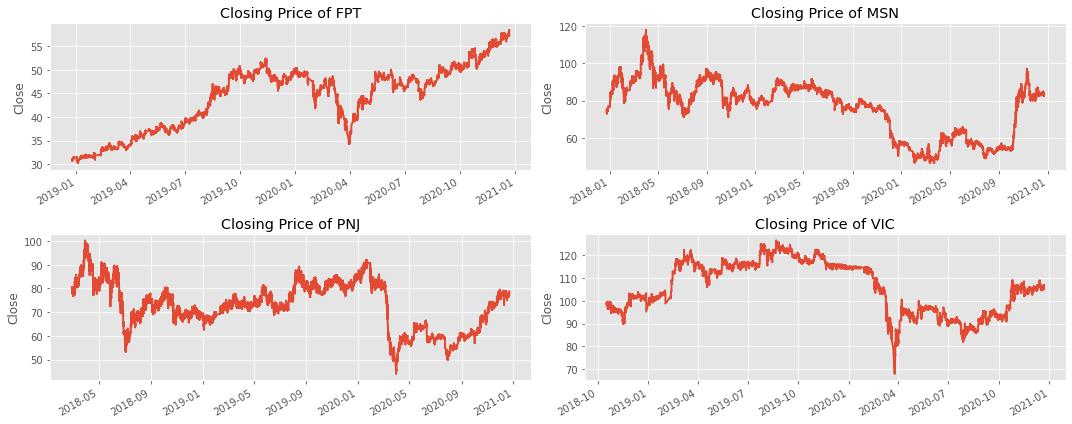

In [40]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, ticker in enumerate(Ticker,1):
    plt.subplot(2,2,i)
    ticker['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {lst[i-1]}")
plt.tight_layout()
    
    

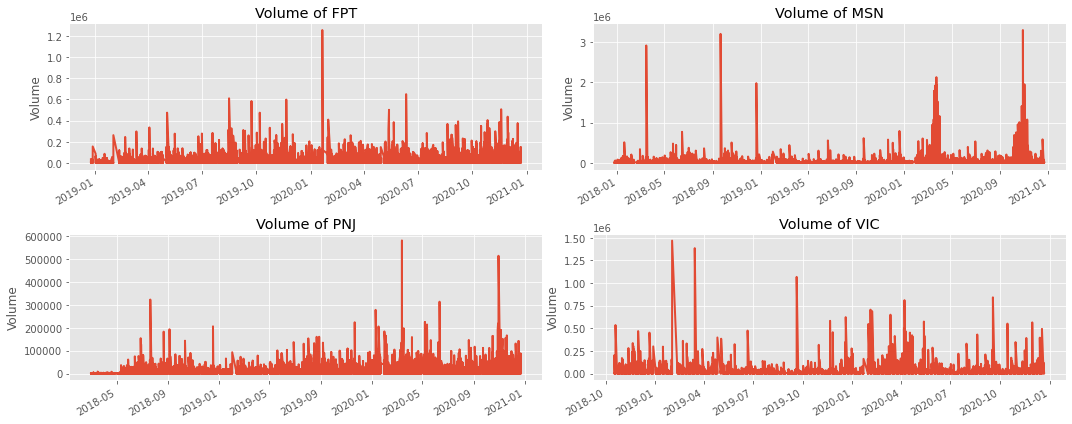

In [41]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, ticker in enumerate(Ticker,1):
    plt.subplot(2,2,i)
    ticker['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of {lst[i-1]}")
plt.tight_layout()

In [42]:
data=FPT.filter(['Close'])
dataset=data.values
training_data_len= int(np.ceil(len(dataset)*.80))

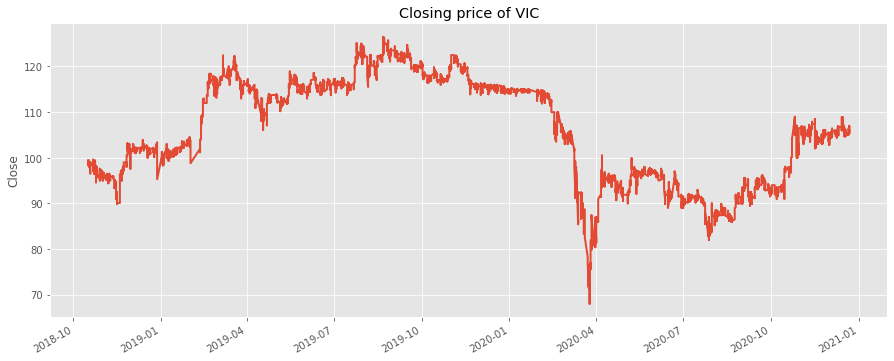

In [43]:
plt.figure(figsize=(15,6))
VIC['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title('Closing price of VIC')
plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)

scaled_data

array([[0.02273535],
       [0.01989343],
       [0.01740675],
       ...,
       [0.9928952 ],
       [0.98934281],
       [0.98934281]])

In [45]:
train_data = scaled_data[0:int(training_data_len),:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

[array([0.02273535, 0.01989343, 0.01740675, 0.01740675, 0.01740675,
       0.01740675, 0.01456483, 0.03055062, 0.03339254, 0.03339254,
       0.03197158, 0.03055062, 0.03055062, 0.03055062, 0.03339254,
       0.03339254, 0.03055062, 0.03445826, 0.03445826, 0.02806394,
       0.02806394, 0.02522202, 0.02522202, 0.02522202, 0.02522202,
       0.02273535, 0.02273535, 0.02522202, 0.02273535, 0.02273535,
       0.02522202, 0.02522202, 0.02806394, 0.03339254, 0.03055062,
       0.03197158, 0.03197158, 0.03055062, 0.03055062, 0.03055062,
       0.03055062, 0.03339254, 0.03339254, 0.03339254, 0.03055062,
       0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03197158,
       0.03197158, 0.03055062, 0.03197158, 0.03055062, 0.03197158,
       0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03055062])]
[0.03197158081705154]

[array([0.02273535, 0.01989343, 0.01740675, 0.01740675, 0.01740675,
       0.01740675, 0.01456483, 0.03055062, 0.03339254, 0.03339254,
       0.03197158, 0.03055062, 0.03

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model =Sequential()
model.add(LSTM(128,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=1, epochs=5)

Epoch 1/5
77865/77865 [==============================] - 2292s 29ms/step - loss: 5.7304e-05
Epoch 2/5
77865/77865 [==============================] - 2731s 35ms/step - loss: 2.2227e-05
Epoch 3/5
77865/77865 [==============================] - 2426s 31ms/step - loss: 1.8442e-05
Epoch 4/5
77865/77865 [==============================] - 2407s 31ms/step - loss: 1.5954e-05
Epoch 5/5
77865/77865 [==============================] - 3164s 41ms/step - loss: 1.4318e-05


In [47]:
test_data= scaled_data[training_data_len-60:,:]
x_test=[]
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

609/609 [==============================] - 53s 47ms/step


In [48]:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

0.5181062894490562

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9852\2578766690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

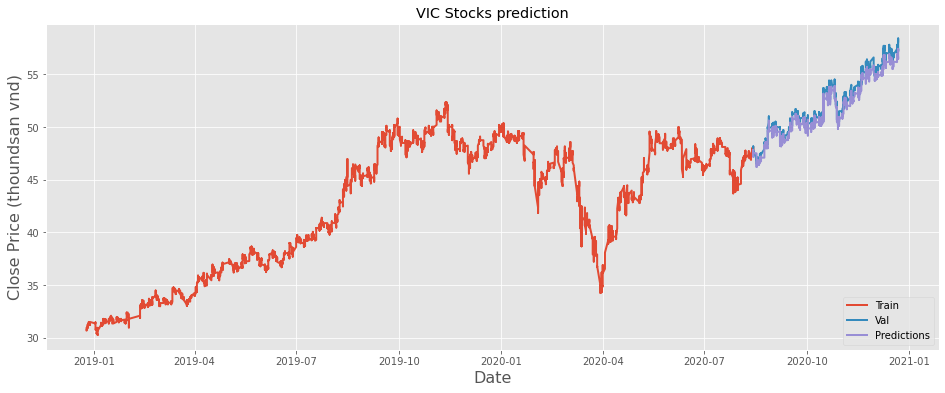

In [49]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('VIC Stocks prediction')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Close Price (thoundsan vnd)',fontsize = 16)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show